In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Modelling I

## Data Cleaning

The resale datasets span multiple time periods (1990–present) and were originally provided as separate files.

In [2]:
df1 = pd.read_csv("resale-flat-prices-based-on-approval-date-1990-1999.csv")
df2 = pd.read_csv("resale-flat-prices-based-on-approval-date-2000-feb-2012.csv")
df3 = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv")
df4 = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")
df5 = pd.read_csv("resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv")

In [3]:
display(df1.head())
display(df2.head())
display(df3.head())
display(df4.head())
display(df5.head())

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


For datasets that did not originally include remaining lease, it is calculated using:

Remaining Lease = 99 - (Transaction Year - Lease Commence Date)

Remaining lease is an important structural variable because:
- Buyers typically prefer flats with longer lease durations
- Lease decay affects long-term property valuation
- It allows us to measure depreciation impact on resale prices

In [4]:
df4['remaining_lease'] = df4['remaining_lease'].str[:2].astype(int)
df1['remaining_lease'] = df1['lease_commence_date'] + 99 - df1['month'].str[:4].astype(int)
df2['remaining_lease'] = df2['lease_commence_date'] + 99 - df2['month'].str[:4].astype(int)
df5['remaining_lease'] = df5['lease_commence_date'] + 99 - df5['month'].str[:4].astype(int)
display(df1.head())
display(df2.head())
display(df4.head())
display(df5.head())

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000,86
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000,86
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000,86
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000,86
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200,85


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,85
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,85
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,75
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,75
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,75


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,73
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,67
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,67
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,71
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,67


To ensure consistency and allow for longitudinal analysis, all datasets are appended into a single master dataframe. This allows us to perform time-series analysis across years and train predictive models on the full resale history

In [5]:
df_combined = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [6]:
df_combined['month'] = pd.to_datetime(df_combined['month'])
df_combined['town'] = df_combined['town'].str.upper()
df_combined['flat_type'] = df_combined['flat_type'].str.title()
df_combined['flat_model'] = df_combined['flat_model'].str.title()
df_combined['resale_price'] = df_combined['resale_price'].astype(float)
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,ANG MO KIO,1 Room,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,86
1,1990-01-01,ANG MO KIO,1 Room,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,86
2,1990-01-01,ANG MO KIO,1 Room,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,86
3,1990-01-01,ANG MO KIO,1 Room,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,86
4,1990-01-01,ANG MO KIO,3 Room,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,85
...,...,...,...,...,...,...,...,...,...,...,...
826576,2014-12-01,YISHUN,5 Room,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,73
826577,2014-12-01,YISHUN,Executive,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,73
826578,2014-12-01,YISHUN,Executive,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,77
826579,2014-12-01,YISHUN,Executive,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,70


The 'storey_range' variable originally appears as a range which is a string. In order to convert it into a numerical variable, we extract the lower bound value.

This allows us to:
- Measure the price premium of higher floors
- Perform correlation and regression analysis
- Identify whether vertical location influences resale value

Additionally, to standardise pricing across different flat sizes, we calculate the Price Per Sqm = Resale Price / Floor Area. By doing so, it allows for fair comparison across flat types and better reflects location premium.

In [7]:
df_combined['storey_lower'] = df_combined['storey_range'].str[:2].astype(int)
df_combined['flat_age'] = df_combined['month'].dt.year - df_combined['lease_commence_date']
df_combined['price_per_sqm'] = df_combined['resale_price'] / df_combined['floor_area_sqm']
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,storey_lower,flat_age,price_per_sqm
0,1990-01-01,ANG MO KIO,1 Room,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,86,10,13,290.322581
1,1990-01-01,ANG MO KIO,1 Room,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,86,4,13,193.548387
2,1990-01-01,ANG MO KIO,1 Room,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,86,10,13,258.064516
3,1990-01-01,ANG MO KIO,1 Room,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,86,7,13,193.548387
4,1990-01-01,ANG MO KIO,3 Room,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,85,4,14,646.575342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826576,2014-12-01,YISHUN,5 Room,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,73,10,26,4754.098361
826577,2014-12-01,YISHUN,Executive,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,73,10,26,3698.630137
826578,2014-12-01,YISHUN,Executive,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,77,7,22,4500.000000
826579,2014-12-01,YISHUN,Executive,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,70,7,29,3894.736842


## EDA

We plot the average resale price by month to observe long-term inflation patterns. This helps us identify structural upward trends, detect cyclical fluctuations and potentially understand macroeconomic impacts on housing like inflation.

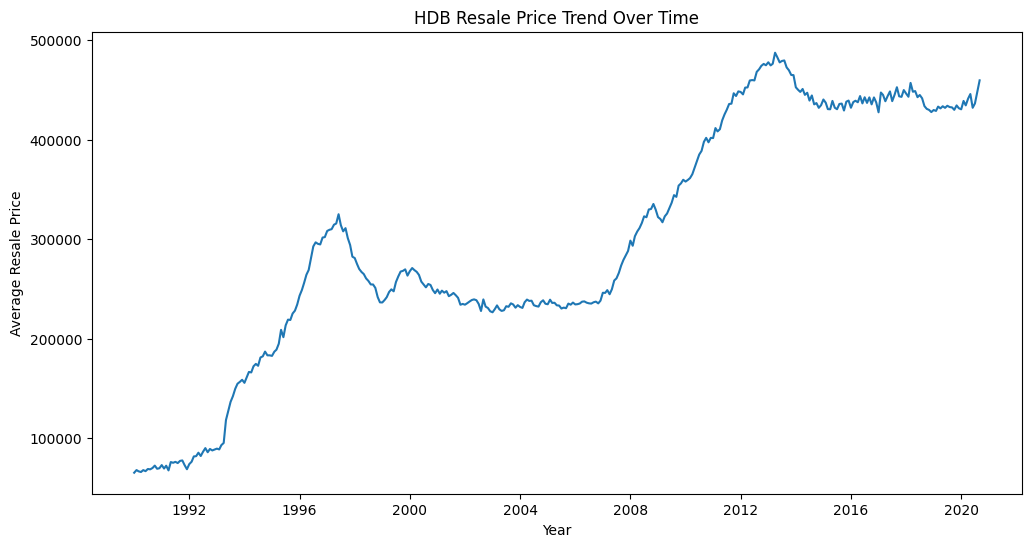

In [8]:
monthly_price = df_combined.groupby('month')['resale_price'].mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_price)
plt.xlabel("Year")
plt.ylabel("Average Resale Price")
plt.title("HDB Resale Price Trend Over Time")
plt.show()

### Price Trend Analysis
The time series plot reveals a strong upward trend in HDB resale prices from 1990 onwards, with notable acceleration in recent years. This reflects Singapore's property market dynamics driven by inflation, improved amenities, and increased demand. The generally smooth trajectory, with occasional fluctuations like in 1998 which could be attributed to the global financial crisis. This suggests that HDB resale prices are influenced by macroeconomic cycles. This trend is critical for modeling as it indicates non-stationarity—future price predictions must account for temporal growth patterns rather than assuming prices revert to historical means.

Next, a boxplot is used to compare resale price distributions across flat types. This helps us understand which flat types command the highest prices and the variability within each flat category.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '1 Room'),
  Text(1, 0, '3 Room'),
  Text(2, 0, '4 Room'),
  Text(3, 0, '5 Room'),
  Text(4, 0, '2 Room'),
  Text(5, 0, 'Executive'),
  Text(6, 0, 'Multi Generation'),
  Text(7, 0, 'Multi-Generation')])

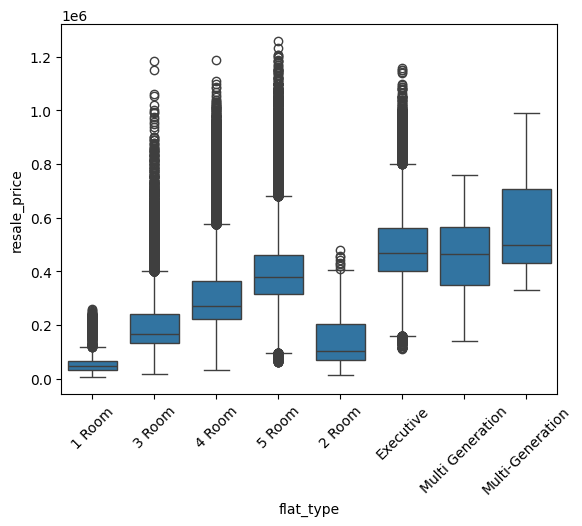

In [9]:
sns.boxplot(data=df_combined, x='flat_type', y='resale_price')
plt.xticks(rotation=45)


### Flat Type Price Distribution
The boxplot demonstrates clear price stratification across flat types, with larger units (5-room and executive flats) having significantly higher median prices than smaller units (1-room and 2-room). The variation in price ranges indicates that flat type is a fundamental determinant of price, but substantial variation within each of the categories suggests other factors (location, lease duration, floor level) also play important roles. This justifies including flat type as a categorical feature in predictive models.

A scatterplot with regression line is used to examine the relationship between remaining lease and resale price. This analysis allows us to determine whether longer lease duration significantly increases price and whether lease decay is a primary pricing factor.

<Axes: xlabel='remaining_lease', ylabel='resale_price'>

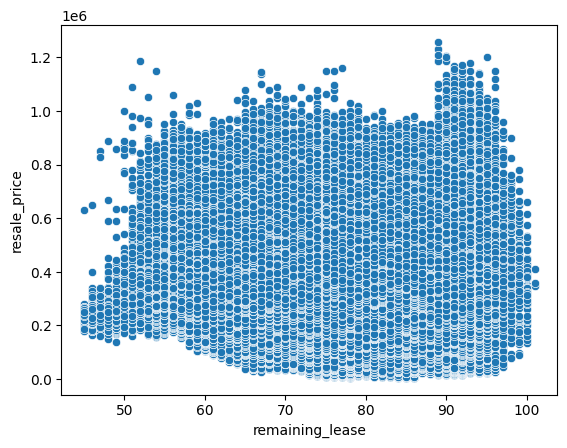

In [10]:
sns.scatterplot(data=df_combined, x='remaining_lease', y='resale_price')

### Lease Duration Impact on Price
The scatter plot shows little variation in resale prices across all lease durations, suggesting that remaining lease duration alone is a weak predictor of price. While there is a general trend of higher prices for longer leases, the wide spread of prices at each lease level indicates that other factors (flat type, location, floor area) play dominant roles in determining price. The lease decay effect exists but is confounded by these other variables, indicating that modeling price requires multivariate analysis rather than simple lease-based valuation.

We also analyse whether higher storeys command a price premium. This allows us to determine if vertical positioning affects valuation.

<Axes: xlabel='storey_lower', ylabel='resale_price'>

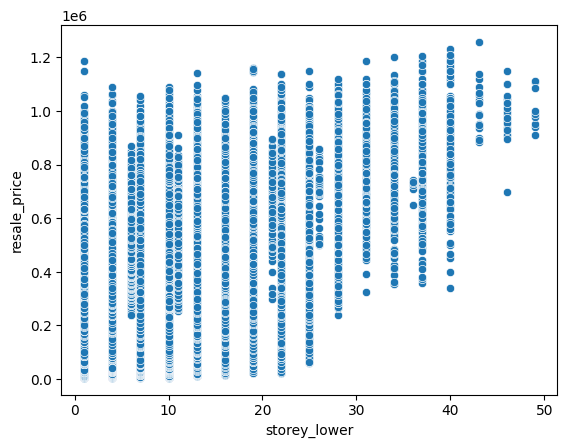

In [11]:
sns.scatterplot(data=df_combined, x='storey_lower', y='resale_price')

### Floor Level Price Premium
The scatter plot reveals a weak-to-moderate positive relationship between storey level and resale price. While higher floors do show somewhat elevated prices on average, the effect is not very pronounced. The wide price variation at all storey levels indicates that floor level alone is not a strong price determinant. This suggests that while verticality may command some premium (potentially due to views, light, and noise reduction), it is a secondary factor compared to structural (flat type, floor area) characteristics.

Lastly, we aggregate resale prices and price per square metre by town and flate type. This allows us to identify high-premium towns and understand whether location is a dominant pricing factor.

<Axes: xlabel='flat_type', ylabel='town'>

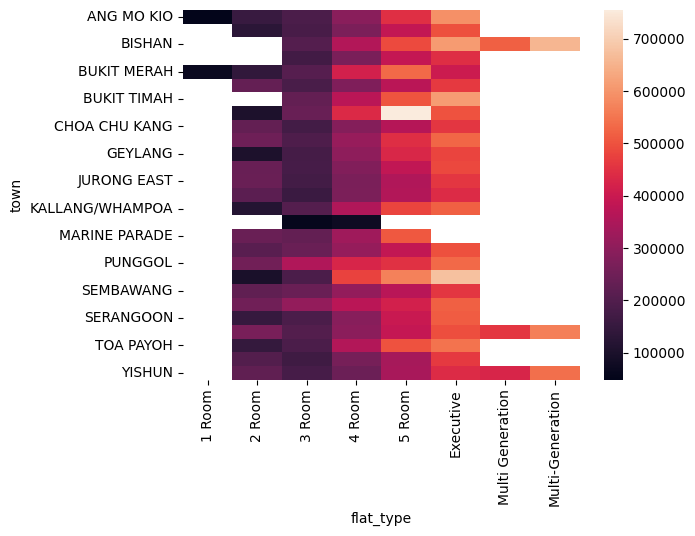

In [12]:
town_flat = df_combined.groupby(['town','flat_type'])['resale_price'].mean().unstack()
sns.heatmap(town_flat)

### Town-Flat Type Price Heatmap
The heatmap reveals striking geographic variation in resale prices, with central and newer estates (such as Punggol and Sengkang) commanding substantially higher prices across all flat types. The color intensity variation indicates that location is a dominant pricing factor. This geographic premium effect is critical for modeling and suggests that town-based segmentation or explicit geographic encoding will substantially improve prediction accuracy.

<Axes: xlabel='flat_type', ylabel='town'>

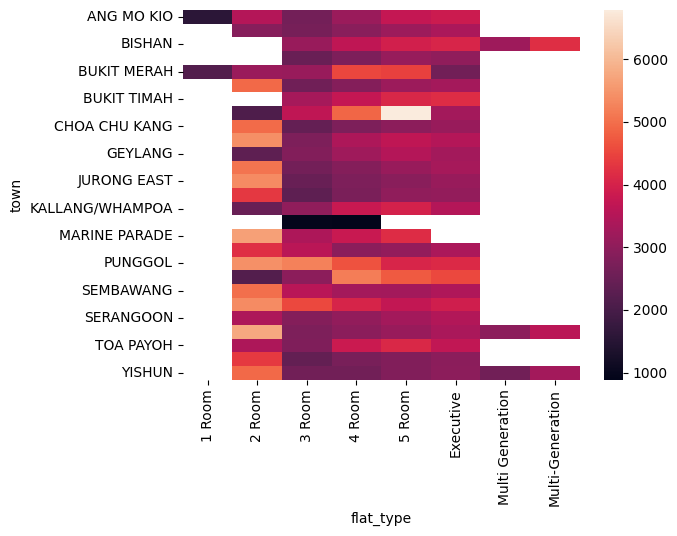

In [13]:
town_flat_persqm = df_combined.groupby(['town','flat_type'])['price_per_sqm'].mean().unstack()
sns.heatmap(town_flat_persqm)

### Town-Flat Type Price Per Square Meter Heatmap
The second heatmap displays price-per-square-meter (normalized pricing), which controls for differences in flat size. This reveals location premium more clearly. Towns with high absolute prices and high normalized pricing are genuinely premium due to location desirability such as Sengkang, Hougang and Tampines, while those with moderate prices but low normalized pricing may simply have larger flats. The variation in normalized pricing across towns confirms that location commands a pure premium independent of unit size. This metric is essential for fair price comparisons and suggests that location effects cannot be simply attributed to floor area differences.

## Model

Moving onto the modelling portion, first we perform a train-validation-test split. Afterwhich, we split numerical and categorical features and use a preprocessor to scale and encode the numeric and categorical feautres respectively.

In [14]:
X = df_combined.drop(columns=['block', 'street_name', 'storey_range', 'lease_commence_date', 'price_per_sqm', 'resale_price'])
y = df_combined['resale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Convert month to numeric
X_train['month'] = X_train['month'].map(pd.Timestamp.toordinal)
X_test['month'] = X_test['month'].map(pd.Timestamp.toordinal)

categorical_features = ['town', 'flat_type', 'flat_model']
numeric_features = [
    'floor_area_sqm',
    'remaining_lease',
    'storey_lower',
    'flat_age',
    'month'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)



We train a linear regression model first to provide interpretability and establish a baseline performance.

In [16]:
# Create pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train
lr_pipeline.fit(X_train, y_train)

# Predict
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluate
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print("MAE:", round(mae_lr, 2))
print("RMSE:", round(rmse_lr, 2))
print("R²:", round(r2_lr, 4))

Linear Regression Performance:
MAE: 49996.21
RMSE: 65080.35
R²: 0.8072


Following the baseline Linear Regression model, an XGBoost Regressor is implemented to capture potential nonlinear relationships in the data. While Linear Regression assumes a linear relationship between features and resale price, XGBoost is able to model complex interactions between structural attributes (e.g., floor area, lease, storey level) and locational factors (e.g., town).

This allows us to evaluate whether a nonlinear boosting model improves prediction accuracy over the linear baseline.

In [17]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=300,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        tree_method="hist"
    ))
])

# Train
xgb_pipeline.fit(X_train, y_train)

# Predict
y_pred_rf = xgb_pipeline.predict(X_test)

# Evaluate
mae_xgb = mean_absolute_error(y_test, y_pred_rf)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_xgb = r2_score(y_test, y_pred_rf)

print("\nXGBoost Performance:")
print("MAE:", round(mae_xgb, 2))
print("RMSE:", round(rmse_xgb, 2))
print("R²:", round(r2_xgb, 4))



XGBoost Performance:
MAE: 16084.24
RMSE: 23204.73
R²: 0.9755


## Feature Importance

We extract feature importance scores from the XGBoost model. Since categorical variables are one-hot encoded (e.g., town_*), we aggregate importance scores by category to determine the overall contribution of each of the variables rather than the dummies.

In [18]:
xgb_model = xgb_pipeline.named_steps['model']
preprocessor_fitted = xgb_pipeline.named_steps['preprocessor']

# Get feature names
encoded_cat_features = preprocessor_fitted.named_transformers_['cat']\
    .get_feature_names_out(categorical_features)

all_features = numeric_features + list(encoded_cat_features)

# Get importance
feature_importance = pd.DataFrame({
    'feature': all_features,
    'importance': xgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importance.head(15)

,feature,importance
32,flat_type_1 Room,0.181126
35,flat_type_4 Room,0.096518
34,flat_type_3 Room,0.056686
33,flat_type_2 Room,0.046088
4,month,0.042257
58,flat_model_Type S1,0.038110
43,flat_model_Dbss,0.036421
37,flat_type_Executive,0.034716
24,town_QUEENSTOWN,0.031593
9,town_BUKIT MERAH,0.031189


In [19]:
importance_summary = {
    'floor_area_sqm': feature_importance[feature_importance['feature'] == 'floor_area_sqm']['importance'].iloc[0],

    'remaining_lease': feature_importance[feature_importance['feature'] == 'remaining_lease']['importance'].iloc[0],

    'storey_lower': feature_importance[feature_importance['feature'] == 'storey_lower']['importance'].iloc[0],

    'flat_age': feature_importance[feature_importance['feature'] == 'flat_age']['importance'].iloc[0],

    'month': feature_importance[feature_importance['feature'] == 'month']['importance'].iloc[0],
    
    'Town (Location)': feature_importance[
        feature_importance['feature'].str.contains('town_')
    ]['importance'].sum(),
    
    'Flat Type': feature_importance[
        feature_importance['feature'].str.contains('flat_type_')
    ]['importance'].sum(),

     'Flat Model': feature_importance[
        feature_importance['feature'].str.contains('flat_model_')
    ]['importance'].sum()
}

importance_summary = pd.DataFrame.from_dict(
    importance_summary,
    orient='index',
    columns=['Total Importance']
).sort_values(by='Total Importance', ascending=False)

importance_summary

,Total Importance
Flat Type,0.420160
Town (Location),0.359177
Flat Model,0.138504
month,0.042257
floor_area_sqm,0.029960
storey_lower,0.005701
flat_age,0.002454
remaining_lease,0.001788


Based on model findings, the key drivers of resale prices are identified to be the Flat type and the Town. Town accounts for location-based pricing premiums, while flat type (particularly larger units like 5-room and executive flats) commands structural price premiums due to size and amenities. To address housing affordability, interventions should target these areas.

### Strategy: Increasing Supply in High-Premium Towns

**Rationale:**
High-premium towns (such as Sengkang, Punggol, and other established areas near CBD or transport nodes) exhibit substantially elevated resale prices compared to peripheral towns. This geographic premium reflects constrained supply relative to demand, scarcity of land in mature estates, and higher land acquisition costs. Increasing supply in these premium towns directly addresses the supply-demand imbalance.

**Implementation Mechanisms:**
- Accelerate construction of new HDB flats in high-premium towns through reserve land acquisition or mixed-development schemes
- Encourage densification and vertical development to maximize units per hectare
- Improve transport connectivity to underutilized peripheral towns, gradually shifting geographic premiums outward
- Offer preferential pricing or allocation schemes for new units in premium towns to new buyers

**Expected Impact:**
By increasing supply, prices in premium towns should normalize downward as scarcity premium dissipates. The geographic price differential between premium and peripheral towns would compress, improving overall affordability. However, implementation timelines are lengthy (3-5+ years for construction), requiring sustained policy commitment.

**Trade-offs:**
- Supply expansion requires significant capital and land availability, potentially diverting resources from other infrastructure priorities

# Modelling II: Considerations for Building an In-House Predictive Model

To build an in-house predictive model for estimating HDB resale prices, we need to first define the objective, which is to predict resale prices based on historical flat transaction data given the dataset which includes features such as town, flat type, floor area, storey range, flat model, lease commencement date, and remaining lease.

Key considerations include understanding the data through performing visualisations to understand which features may be of relevance as well as to spot trends, engineering additional features (like age of flat), and choosing a suitable model (tree-based models such as Random Forest or XGBoost can capture non-linear effects and interactions).

Data preprocessing would involve encoding categorical variables, scaling numerical features, and handling missing values. Model evaluation should focus on metrics meaningful to users, such as RMSE or percentage error.

Finally, building an in-house model requires establishing a data pipeline and ensuring model retraining as market trends evolve or as more data becomes available as time goes by.

# Link Analysis I

Each node represents a property listing (Jan 2017 onwards).

Edges are created between listings that share:
- Same town
- Same flat type
- Similar structural characteristics

This similarity-based graph models market segmentation and substitutability.

The objective is to analyse how listings cluster within the resale market.

In [ ]:
import networkx as nx
from sklearn.neighbors import NearestNeighbors

features = df4[['floor_area_sqm', 'remaining_lease']]
features_scaled = StandardScaler().fit_transform(features)

k = 5
G = nx.Graph()

for town in df4['town'].unique():
    # Flats in this town
    print(f"Processing town: {town}")
    town_df = df4[df4['town'] == town].reset_index(drop=False)
    if len(town_df) < 2:
        continue
    town_features = features_scaled[town_df.index]
    
    # Fit Nearest Neighbors for this town
    nn = NearestNeighbors(n_neighbors=min(k, len(town_df)), metric='cosine').fit(town_features)
    distances, indices = nn.kneighbors(town_features)
    
    # Add nodes
    for i, row in town_df.iterrows():
        G.add_node(
            row['index'], 
            town=row['town'],
            flat_type=row['flat_type'],
            floor_area_sqm=row['floor_area_sqm'],
            remaining_lease=row['remaining_lease'],
            resale_price=row['resale_price']
        )
    
    # Add edges for top-k neighbors
    for i, neighbors in enumerate(indices):
        for j_idx, j in enumerate(neighbors):
            if i != j:
                similarity = 1 - distances[i][j_idx]
                G.add_edge(town_df.iloc[i]['index'], town_df.iloc[j]['index'], weight=similarity)


Processing town: ANG MO KIO
Processing town: BEDOK
Processing town: BISHAN
Processing town: BUKIT BATOK
Processing town: BUKIT MERAH
Processing town: BUKIT PANJANG
Processing town: BUKIT TIMAH
Processing town: CENTRAL AREA
Processing town: CHOA CHU KANG
Processing town: CLEMENTI
Processing town: GEYLANG
Processing town: HOUGANG
Processing town: JURONG EAST
Processing town: JURONG WEST
Processing town: KALLANG/WHAMPOA
Processing town: MARINE PARADE
Processing town: PASIR RIS
Processing town: PUNGGOL
Processing town: QUEENSTOWN
Processing town: SEMBAWANG
Processing town: SENGKANG
Processing town: SERANGOON
Processing town: TAMPINES
Processing town: TOA PAYOH
Processing town: WOODLANDS
Processing town: YISHUN


In [24]:
G.number_of_nodes(), G.number_of_edges()

(80374, 258014)

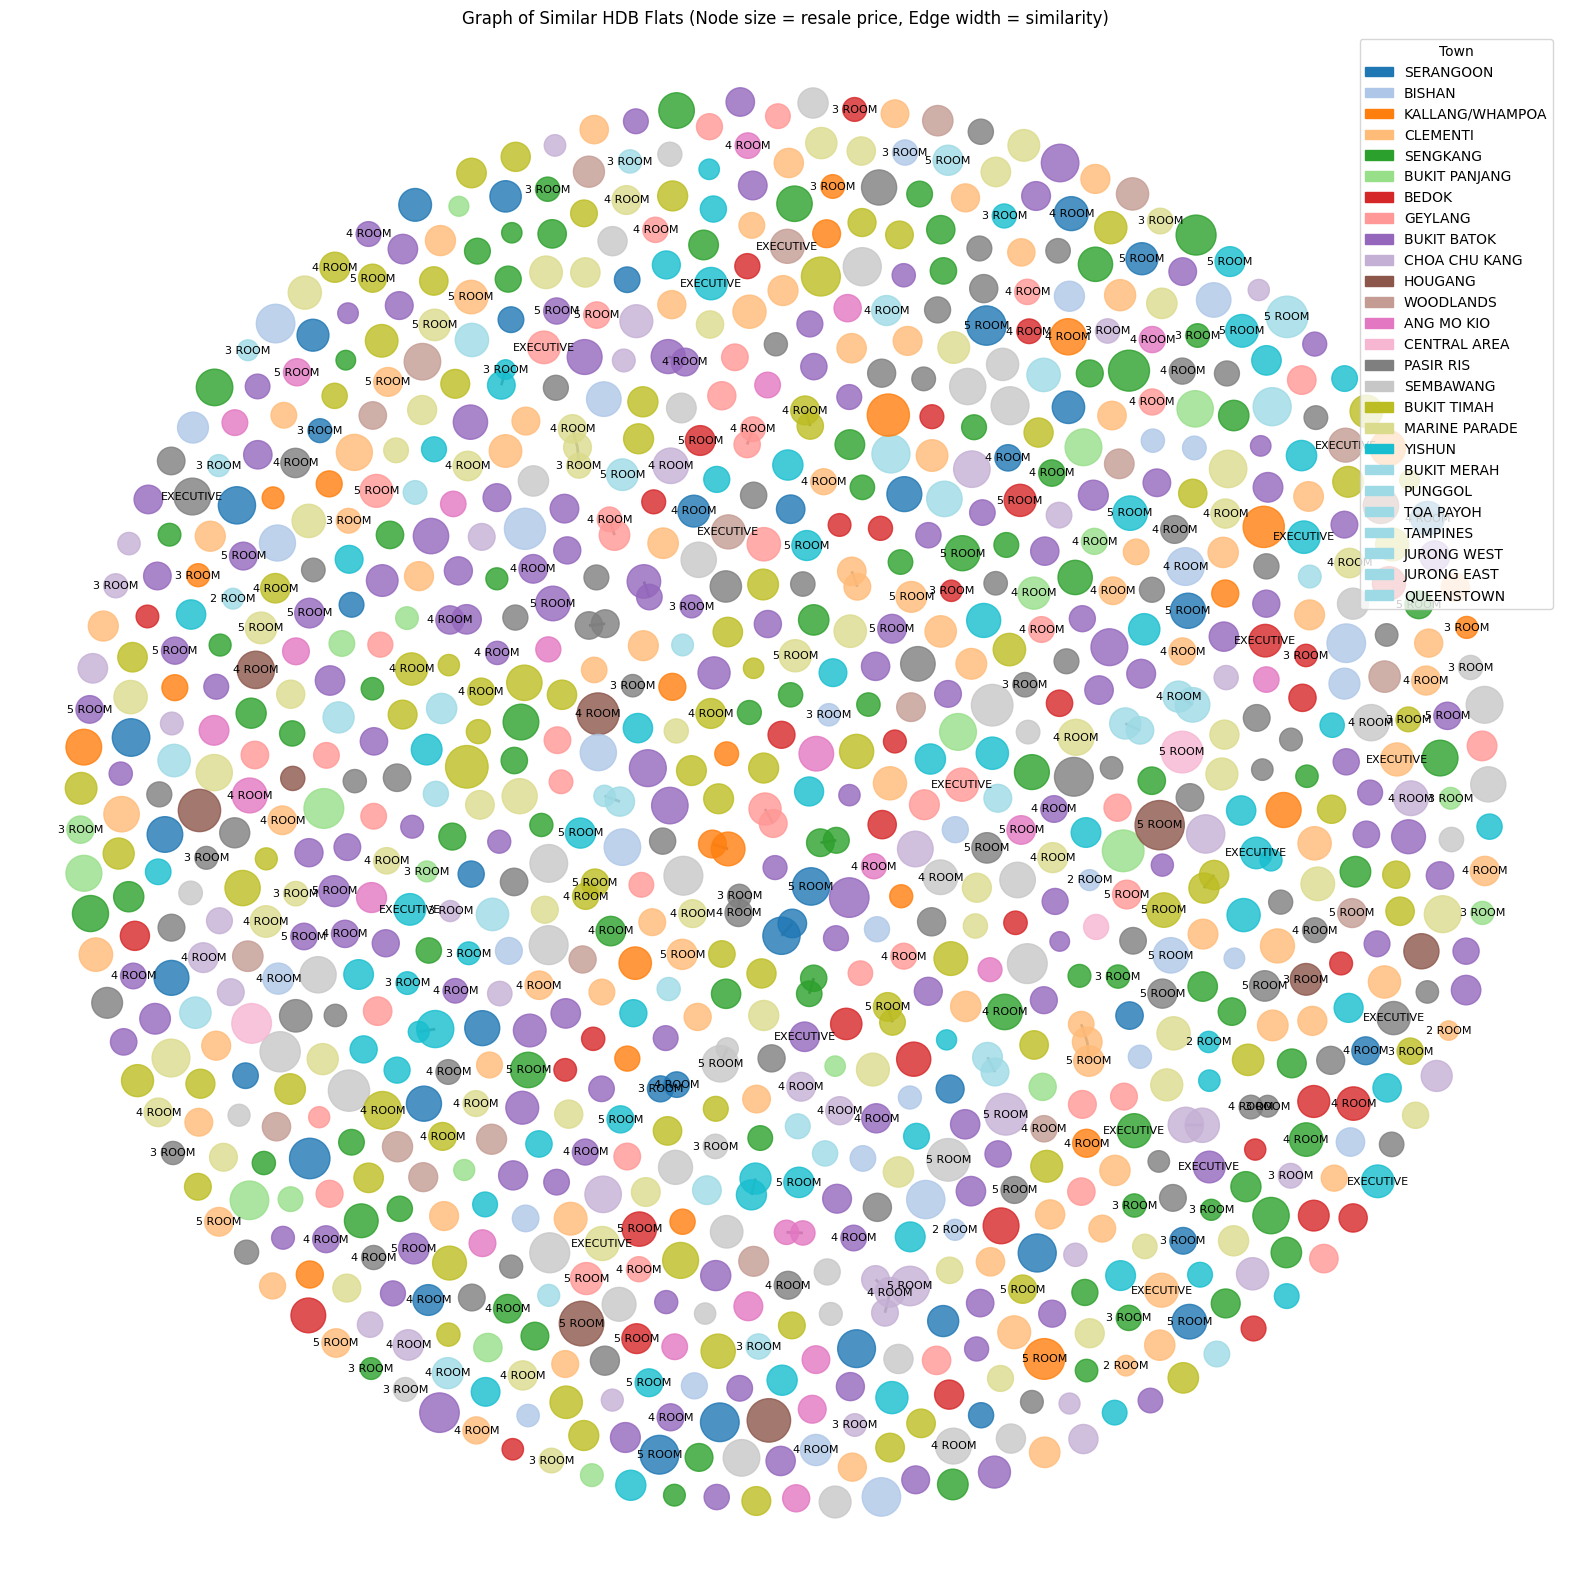

In [39]:
import random
import matplotlib.patches as mpatches

sample_nodes = random.sample(list(G.nodes()), 1000)
H = G.subgraph(sample_nodes)

pos = nx.spring_layout(H, seed=42)

node_sizes = [H.nodes[n]['resale_price']/1000 for n in H.nodes()]

towns = list(set(nx.get_node_attributes(H, 'town').values()))
town_color_map = {town: i for i, town in enumerate(towns)}
node_colors = [town_color_map[H.nodes[n]['town']] for n in H.nodes()]
colors = plt.cm.tab20(range(len(towns)))  

edges = H.edges(data=True)
edge_widths = [d['weight']*2 for (u,v,d) in edges]

plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(H, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.tab20, alpha=0.8)
nx.draw_networkx_edges(H, pos, width=edge_widths, alpha=0.5)

sample_labels = random.sample(list(H.nodes()), 250)
nx.draw_networkx_labels(H, pos, labels={n: H.nodes[n]['flat_type'] for n in sample_labels}, font_size=8)

patches = [mpatches.Patch(color=colors[i], label=towns[i]) for i in range(len(towns))]
plt.legend(handles=patches, title="Town", loc='upper right')

plt.title("Graph of Similar HDB Flats (Node size = resale price, Edge width = similarity)")
plt.axis('off')
plt.show()

The full graph contains all property listings in from January 2017 onwards, with nodes representing listings and edges built town-by-town via nearest-neighbor similarity on 'floor_area_sqm' and 'remaining_lease'. The size of each node is representative of the resale price - the larger the node, the more expensive the property is. However, visualizing the entire graph would result in an unintelligible dense network with thousands of overlapping nodes and edges.

To maintain visual clarity while preserving the graph's structure, we sample **1,000 nodes randomly** from the full graph and visualize the subgraph. This subsample:
- Retains the town-based clustering and community structure
- Preserves edge weights and node attributes

The subgraph H is representative of the full graph G - if the full graph shows clear town clusters and price tiers, H will exhibit the same patterns at a smaller scale. Edge density, centrality, and modularity metrics computed on H approximate those of G, allowing insights to transfer to the full market.


# Link Analysis II

## Algorithm 1: PageRank - Identifying Market Influence

PageRank measures node importance by considering both the number of connections and the importance of connected nodes. A property becomes central if it is connected to other important properties. The algorithm iteratively updates scores until convergence, identifying properties that anchor the market.

Properties with high PageRank scores represent structural market anchors—standard units that serve as pricing benchmarks. These properties have transparent pricing due to abundant comparables. Properties with low PageRank scores are structural outliers with limited comparables, making their pricing more subjective and less market-driven.


In [41]:
# Compute PageRank on full graph G
pagerank_scores = nx.pagerank(G, weight='weight', alpha=0.85)

# Top 15 properties by PageRank
top_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:15]
print("TOP 15 PROPERTIES BY PAGERANK\n")
pagerank_df = []
for node_id, score in top_pagerank:
    node_data = G.nodes[node_id]
    pagerank_df.append({
        'Node': node_id,
        'Town': node_data['town'],
        'Flat Type': node_data['flat_type'],
        'Floor Area (sqm)': node_data['floor_area_sqm'],
        'Remaining Lease': node_data['remaining_lease'],
        'Price': f"${node_data['resale_price']:,.0f}",
        'PageRank Score': f"{score:.6f}"
    })

pagerank_results = pd.DataFrame(pagerank_df)
print(pagerank_results.to_string(index=False))


TOP 15 PROPERTIES BY PAGERANK

 Node        Town Flat Type  Floor Area (sqm)  Remaining Lease    Price PageRank Score
75443      YISHUN EXECUTIVE             169.0               71 $780,000       0.000135
11315   WOODLANDS    4 ROOM              98.0               67 $340,000       0.000133
70046    SENGKANG    5 ROOM             113.0               94 $593,000       0.000131
34672      YISHUN    3 ROOM              67.0               65 $240,000       0.000124
24165    SENGKANG    5 ROOM             123.0               80 $515,000       0.000124
51433 JURONG WEST    5 ROOM             121.0               69 $352,000       0.000114
 6811 JURONG WEST    3 ROOM              61.0               56 $235,000       0.000112
77141    SENGKANG    4 ROOM              90.0               81 $360,000       0.000112
11046    SENGKANG EXECUTIVE             125.0               82 $545,000       0.000108
20018    SENGKANG    4 ROOM              92.0               89 $508,000       0.000108
20024    SEN

## Algorithm 2: Minimum Spanning Tree - Essential Market Structure

The Minimum Spanning Tree (MST) identifies the subset of edges which connect all nodes while minimizing total cost. In this case, we maximise similarity by using inverted edge weights. This reduces the full graph to its structural backbone, removing redundant connections while preserving connectivity.

The MST reveals which properties define market structure without redundancy. Properties in the MST are essential reference points as their connections represent the most meaningful structural relationships.


In [ ]:
# Minimum Spanning Tree
mst = nx.minimum_spanning_tree(G, weight='weight', algorithm='kruskal')

print(f"\nMINIMUM SPANNING TREE")
print(f"MST Nodes: {mst.number_of_nodes()}")
print(f"MST Edges: {mst.number_of_edges()}")
print(f"Original Edges: {G.number_of_edges()}")
print(f"Redundant Edges: {G.number_of_edges() - mst.number_of_edges()}")
print(f"Reduction: {100 * (1 - mst.number_of_edges() / G.number_of_edges()):.1f}%")

# high-degree nodes in MST represent top hubs
mst_degrees = dict(mst.degree())
top_hubs = sorted(mst_degrees.items(), key=lambda x: x[1], reverse=True)[:15]

print(f"\nTop 15 Hub Properties (MST Degree):")
hub_data = []
for node, degree in top_hubs:
    hub_data.append({
        'Town': G.nodes[node]['town'],
        'Flat Type': G.nodes[node]['flat_type'],
        'Floor Area (sqm)': int(G.nodes[node]['floor_area_sqm']),
        'Remaining Lease': int(G.nodes[node]['remaining_lease']),
        'Resale Price ($)': int(G.nodes[node]['resale_price']),
        'MST Degree': degree
    })

hub_df = pd.DataFrame(hub_data)
print(hub_df.to_string(index=False))



MINIMUM SPANNING TREE
MST Nodes: 80374
MST Edges: 75163
Original Edges: 258014
Redundant Edges: 182851
Reduction: 70.9%

Top 15 Hub Properties (MST Degree):
       Town Flat Type  Floor Area (sqm)  Remaining Lease  Resale Price ($)  MST Degree
     YISHUN    4 ROOM                93               95            430000          64
JURONG WEST    4 ROOM               103               66            380000          60
   SENGKANG EXECUTIVE               125               82            545000          60
JURONG WEST    3 ROOM                61               56            235000          59
JURONG WEST    5 ROOM               132               78            405000          55
  WOODLANDS EXECUTIVE               170               77            588000          55
   SENGKANG EXECUTIVE               142               82            560000          54
JURONG WEST    4 ROOM               105               78            340000          48
     YISHUN    3 ROOM                67               65   

## Summary: Insights from Graph Algorithms

PageRank and the Minimum Spanning Tree provide complementary perspectives on market structure. PageRank identifies structurally central properties that function as market anchors across the entire network, while the MST reveals the essential backbone of market relationships - the minimal subset of connections that preserves all properties' connectivity without redundancy.

These algorithms demonstrate that the HDB resale market exhibits organized structure. Hub properties identified through MST degree analysis represent critical reference points and properties with high PageRank represent broader market anchors. This structure explains pricing variation and informs valuation methodology by clarifying which properties are most central to market organization.
